In [1]:
## Pakker og OS key
from corrective_rag import corrective_rag_translated
from simple_agent_rag import simple_agent_rag, simple_agent_rag_translated
from naive_rag import naive_rag_translated, naive_rag
from react_rag import react_rag, react_rag_translated
from init_vectorstore import init_vectorstore, init_semantic_vectorstore
from evaluate_model import evaluate_model
from ensemble_model import ensemble_models
from semantic_model import semantic_model
from ragas_func import ragas_with_params
from helper_functions import create_predictions_dict, average_RAGAS_score
from langchain_openai import ChatOpenAI
from langchain_community.embeddings import SentenceTransformerEmbeddings
import os
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from datasets import load_dataset
import matplotlib.pyplot as plt
os.environ["OPENAI_API_KEY"] = "sk-proj-X4gn8eON1LXhxyVOV0JaT3BlbkFJK49GKhC50Zs5xy4xmCI2"

In [2]:
## Instances and file path
instances = 100
file_path = "/Users/adrianfolge/Documents/lokal:skole/Master/data/synthetic_data/vol2_questions_and_answers_ytterligere_revidert.csv"

In [3]:
## Text splitter, embeddings, llm
text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=0)
## Husk å endre embedding-modell for norsk/engelsk
embeddings_nor = SentenceTransformerEmbeddings(model_name='sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
embeddings_trans = OpenAIEmbeddings(model="text-embedding-3-small")
llm = ChatOpenAI(model="gpt-3.5-turbo-1106")

In [4]:
## Init databases
databases = init_vectorstore(embeddings_nor, text_splitter)
databases_translated = init_vectorstore(embeddings_trans, text_splitter, translate=True)
semantic_databases = init_semantic_vectorstore()

100%|██████████| 10/10 [00:09<00:00,  1.07it/s]
Created a chunk of size 1147, which is longer than the specified 500
Created a chunk of size 1570, which is longer than the specified 500
Created a chunk of size 639, which is longer than the specified 500
Created a chunk of size 610, which is longer than the specified 500
Created a chunk of size 1008, which is longer than the specified 500
Created a chunk of size 545, which is longer than the specified 500
Created a chunk of size 536, which is longer than the specified 500
Created a chunk of size 583, which is longer than the specified 500
Created a chunk of size 1162, which is longer than the specified 500
Created a chunk of size 607, which is longer than the specified 500
Created a chunk of size 1206, which is longer than the specified 500
Created a chunk of size 697, which is longer than the specified 500
Created a chunk of size 734, which is longer than the specified 500
Created a chunk of size 916, which is longer than the specified

In [5]:
## Loading the reference question/answers
references = load_dataset('csv', data_files=file_path, split=f"train[:{instances}]")
refs = references["svar"]
questions = references["spørsmål"]

In [8]:
## Getting the answers and contexts from the models
corrective_rag_translated_list, corrective_rag_translated_context = corrective_rag_translated(instances, file_path, databases_translated, llm)
simple_agent_rag_list = simple_agent_rag(instances, file_path, databases, llm)
simple_agent_rag_translated_list = simple_agent_rag_translated(instances, file_path, databases_translated, llm)
naive_rag_list = naive_rag(instances, file_path, databases)
naive_rag_translated_list = naive_rag_translated(instances, file_path, databases_translated)
react_rag_translated_list,react_rag_translated_context  = react_rag_translated(instances, file_path, databases_translated, llm)
react_rag_list, react_rag_context = react_rag(instances, file_path, databases, llm)
semantic_rag_list, semantic_rag_context = semantic_model(instances, file_path, semantic_databases)

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECK RELEVANCE---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
"Node 'grade_documents':"
'\n---\n'
---DECIDE TO GENERATE---
{'documents': [Document(page_content='Municipal sub-plan for the city centre\n\nPlan provisions\n\nAdopted by the city council on 26 August 2021\n\n1\n\n1.\n\nMAIN INTENTIONS OF THE PLAN ................................................. ................................................ .............. 3\n\n2.\n\nLEGAL EFFECT OF THE PLAN ................................................ ................................................ ...................... 3\n\n3.', metadata={'source': '../data/pdfs/Kristiansund.pdf', '_id': '95cdca238c2647648fd8e93f21718bd6', '_collection_name': 'my_documents'}), Document(page_content="The new opera and cultural center must be integrated into city life • It is desirable to have more housing projects in the c

In [9]:
## Init ensemble model
predictions_dict = create_predictions_dict(corrective_rag_translated_list, simple_agent_rag_list, simple_agent_rag_translated_list, naive_rag_list, naive_rag_translated_list, react_rag_translated_list, react_rag_list, semantic_rag_list)
ensembling_models_list = ensemble_models(predictions_dict, references, instances, react_rag_translated_context, llm)

In [14]:
## Initializing RAGAS scores
simple_agent_rag_score_RAGAS = ragas_with_params(simple_agent_rag_list, questions, simple_agent_rag_list, refs)
corrective_rag_translated_score_RAGAS = ragas_with_params(corrective_rag_translated_list, questions, corrective_rag_translated_context, refs)
simple_agent_translated_rag_score_RAGAS = ragas_with_params(simple_agent_rag_translated_list, questions, simple_agent_rag_translated_list, refs)
naive_rag_score_RAGAS = ragas_with_params(naive_rag_list, questions, naive_rag_list, refs)
naive_rag_translated_score_RAGAS = ragas_with_params(naive_rag_translated_list, questions, naive_rag_translated_list, refs)
react_rag_translated_score_RAGAS = ragas_with_params(react_rag_translated_list, questions, react_rag_translated_context, refs)
react_rag_score_RAGAS = ragas_with_params(react_rag_list, questions, react_rag_context, refs)
semantic_rag_score_RAGAS = ragas_with_params(semantic_rag_list, questions, semantic_rag_context, refs)
ensemble_models_score_RAGAS = ragas_with_params(ensembling_models_list, questions, react_rag_translated_context, refs)

Evaluating:   0%|          | 0/400 [00:00<?, ?it/s]

No statements were generated from the answer.
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/ragas/executor.py", line 96, in run
    results = self.loop.run_until_complete(self._aresults())
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/asyncio/base_events.py", line 653, in run_until_complete
    return future.result()
           ^^^^^^^^^^^^^^^
  File "/Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/ragas/executor.py", line 84, in _aresults
    raise e
  File "/Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/ragas/executor.py", line 79, in _aresults
    r = await future
        ^^^^^^^^^^^^
  File "/Users/adrianfolge/anaconda3/envs/MASTER/lib/python

ExceptionInRunner: The runner thread which was running the jobs raised an exeception. Read the traceback above to debug it. You can also pass `raise_exceptions=False` incase you want to show only a warning message instead.

In [29]:
semantic_rag_score_RAGAS_1 = ragas_with_params(semantic_rag_list[:25], questions[:25], semantic_rag_context[:25], refs[:25])
semantic_rag_score_RAGAS_2 = ragas_with_params(semantic_rag_list[25:50], questions[25:50], semantic_rag_context[25:50], refs[25:50])
semantic_rag_score_RAGAS_3 = ragas_with_params(semantic_rag_list[50:75], questions[50:75], semantic_rag_context[50:75], refs[50:75])
semantic_rag_score_RAGAS_4 = ragas_with_params(semantic_rag_list[75:], questions[75:], semantic_rag_context[75:], refs[75:])
avg_1 = average_RAGAS_score(semantic_rag_score_RAGAS_1)
avg_2 = average_RAGAS_score(semantic_rag_score_RAGAS_2)
avg_3 = average_RAGAS_score(semantic_rag_score_RAGAS_3)
avg_4 = average_RAGAS_score(semantic_rag_score_RAGAS_4)
avg_semantic_rag_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
/Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/httpcore/_sync/http11.py:316: RuntimeWarning: coroutine 'Executor.wrap_callable_with_index.<locals>.wrapped_callable_async' was never awaited
  with Trace("receive_response_body", logger, self._request, kwargs):
Task was destroyed but it is pending!
task: <Task pending name='Task-2634' coro=<as_completed.<locals>.sema_coro() running at /Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/ragas/executor.py:38> wait_for=<Future pending cb=[_chain_future.<locals>._call_check_cancel() at /Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/asyncio/futures.py:387, Task.task_wakeup()]> cb=[as_completed.<locals>._on_completion() at /

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


In [30]:
react_rag_score_RAGAS_1 = ragas_with_params(react_rag_list[:25], questions[:25], react_rag_context[:25], refs[:25])
react_rag_score_RAGAS_2 = ragas_with_params(react_rag_list[25:50], questions[25:50], react_rag_context[25:50], refs[25:50])
react_rag_score_RAGAS_3 = ragas_with_params(react_rag_list[50:75], questions[50:75], react_rag_context[50:75], refs[50:75])
react_rag_score_RAGAS_4 = ragas_with_params(react_rag_list[75:], questions[75:], react_rag_context[75:], refs[75:])
avg_1 = average_RAGAS_score(react_rag_score_RAGAS_1)
avg_2 = average_RAGAS_score(react_rag_score_RAGAS_2)
avg_3 = average_RAGAS_score(react_rag_score_RAGAS_3)
avg_4 = average_RAGAS_score(react_rag_score_RAGAS_4)
avg_react_rag_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from 

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from 

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from 

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from 

In [31]:
react_rag_translated_score_RAGAS_1 = ragas_with_params(react_rag_translated_list[:25], questions[:25], react_rag_translated_context[:25], refs[:25])
react_rag_translated_score_RAGAS_2 = ragas_with_params(react_rag_translated_list[25:50], questions[25:50], react_rag_translated_context[25:50], refs[25:50])
react_rag_translated_score_RAGAS_3 = ragas_with_params(react_rag_translated_list[50:75], questions[50:75], react_rag_translated_context[50:75], refs[50:75])
react_rag_translated_score_RAGAS_4 = ragas_with_params(react_rag_translated_list[75:], questions[75:], react_rag_translated_context[75:], refs[75:])
avg_1 = average_RAGAS_score(react_rag_translated_score_RAGAS_1)
avg_2 = average_RAGAS_score(react_rag_translated_score_RAGAS_2)
avg_3 = average_RAGAS_score(react_rag_translated_score_RAGAS_3)
avg_4 = average_RAGAS_score(react_rag_translated_score_RAGAS_4)
avg_react_rag_translated_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


In [25]:
naive_rag_translated_score_RAGAS_1 = ragas_with_params(naive_rag_translated_list[:25], questions[:25], naive_rag_translated_list[:25], refs[:25])
naive_rag_translated_score_RAGAS_2 = ragas_with_params(naive_rag_translated_list[25:50], questions[25:50], naive_rag_translated_list[25:50], refs[25:50])
naive_rag_translated_score_RAGAS_3 = ragas_with_params(naive_rag_translated_list[50:75], questions[50:75], naive_rag_translated_list[50:75], refs[50:75])
naive_rag_translated_score_RAGAS_4 = ragas_with_params(naive_rag_translated_list[75:], questions[75:], naive_rag_translated_list[75:], refs[75:])
avg_1 = average_RAGAS_score(naive_rag_translated_score_RAGAS_1)
avg_2 = average_RAGAS_score(naive_rag_translated_score_RAGAS_2)
avg_3 = average_RAGAS_score(naive_rag_translated_score_RAGAS_3)
avg_4 = average_RAGAS_score(naive_rag_translated_score_RAGAS_4)
avg_naive_rag_translated_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
naive_rag_score_RAGAS_1 = ragas_with_params(naive_rag_list[:25], questions[:25], naive_rag_list[:25], refs[:25])
naive_rag_score_RAGAS_2 = ragas_with_params(naive_rag_list[25:50], questions[25:50], naive_rag_list[25:50], refs[25:50])
naive_rag_score_RAGAS_3 = ragas_with_params(naive_rag_list[50:75], questions[50:75], naive_rag_list[50:75], refs[50:75])
naive_rag_score_RAGAS_4 = ragas_with_params(naive_rag_list[75:], questions[75:], naive_rag_list[75:], refs[75:])
avg_1 = average_RAGAS_score(naive_rag_score_RAGAS_1)
avg_2 = average_RAGAS_score(naive_rag_score_RAGAS_2)
avg_3 = average_RAGAS_score(naive_rag_score_RAGAS_3)
avg_4 = average_RAGAS_score(naive_rag_score_RAGAS_4)
avg_naive_rag_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

/Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/httpx/_models.py:125: RuntimeWarning: coroutine 'Executor.wrap_callable_with_index.<locals>.wrapped_callable_async' was never awaited
  return [(raw_key, value) for raw_key, _, value in self._list]
Task was destroyed but it is pending!
task: <Task pending name='Task-2439' coro=<as_completed.<locals>.sema_coro() running at /Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/ragas/executor.py:38> wait_for=<Future pending cb=[_chain_future.<locals>._call_check_cancel() at /Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/asyncio/futures.py:387, Task.task_wakeup()]> cb=[as_completed.<locals>._on_completion() at /Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/asyncio/tasks.py:602]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2400' coro=<as_completed.<locals>.sema_coro() running at /Users/adrianfolge/anaconda3/envs/MASTER/lib/python3.11/site-packages/ragas/executor.p

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
simple_agent_rag_score_RAGAS_1 = ragas_with_params(simple_agent_rag_list[:25], questions[:25], simple_agent_rag_list[:25], refs[:25])
simple_agent_rag_score_RAGAS_2 = ragas_with_params(simple_agent_rag_list[25:50], questions[25:50], simple_agent_rag_list[25:50], refs[25:50])
simple_agent_rag_score_RAGAS_3 = ragas_with_params(simple_agent_rag_list[50:75], questions[50:75], simple_agent_rag_list[50:75], refs[50:75])
simple_agent_rag_score_RAGAS_4 = ragas_with_params(simple_agent_rag_list[75:], questions[75:], simple_agent_rag_list[75:], refs[75:])
avg_1 = average_RAGAS_score(simple_agent_rag_score_RAGAS_1)
avg_2 = average_RAGAS_score(simple_agent_rag_score_RAGAS_2)
avg_3 = average_RAGAS_score(simple_agent_rag_score_RAGAS_3)
avg_4 = average_RAGAS_score(simple_agent_rag_score_RAGAS_4)
avg_simple_agent_rag_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
simple_agent_translated_rag_score_RAGAS_1 = ragas_with_params(simple_agent_rag_translated_list[:25], questions[:25], simple_agent_rag_translated_list[:25], refs[:25])
simple_agent_translated_rag_score_RAGAS_2  = ragas_with_params(simple_agent_rag_translated_list[25:50], questions[25:50], simple_agent_rag_translated_list[25:50], refs[25:50])
simple_agent_translated_rag_score_RAGAS_3  = ragas_with_params(simple_agent_rag_translated_list[50:75], questions[50:75], simple_agent_rag_translated_list[50:75], refs[50:75])
simple_agent_translated_rag_score_RAGAS_4  = ragas_with_params(simple_agent_rag_translated_list[75:], questions[75:], simple_agent_rag_translated_list[75:], refs[75:])
avg_1 = average_RAGAS_score(simple_agent_translated_rag_score_RAGAS_1)
avg_2 = average_RAGAS_score(simple_agent_translated_rag_score_RAGAS_2)
avg_3 = average_RAGAS_score(simple_agent_translated_rag_score_RAGAS_3)
avg_4 = average_RAGAS_score(simple_agent_translated_rag_score_RAGAS_4)
avg_simple_agent_translated_rag_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.
No statements were generated from the answer.
No statements were generated from the answer.


In [22]:
corrective_rag_translated_score_RAGAS_1 = ragas_with_params(corrective_rag_translated_list[:25], questions[:25], corrective_rag_translated_context[:25], refs[:25])
corrective_rag_translated_score_RAGAS_2 = ragas_with_params(corrective_rag_translated_list[25:50], questions[25:50], corrective_rag_translated_context[25:50], refs[25:50])
corrective_rag_translated_score_RAGAS_3 = ragas_with_params(corrective_rag_translated_list[50:75], questions[50:75], corrective_rag_translated_context[50:75], refs[50:75])
corrective_rag_translated_score_RAGAS_4 = ragas_with_params(corrective_rag_translated_list[75:], questions[75:], corrective_rag_translated_context[75:], refs[75:])
avg_1 = average_RAGAS_score(corrective_rag_translated_score_RAGAS_1)
avg_2 = average_RAGAS_score(corrective_rag_translated_score_RAGAS_2)
avg_3 = average_RAGAS_score(corrective_rag_translated_score_RAGAS_3)
avg_4 = average_RAGAS_score(corrective_rag_translated_score_RAGAS_4)
avg_corrective_rag_translated_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

No statements were generated from the answer.


In [32]:
ensemble_models_score_RAGAS_1 = ragas_with_params(ensembling_models_list[:25], questions[:25], react_rag_translated_context[:25], refs[:25])
ensemble_models_score_RAGAS_2 = ragas_with_params(ensembling_models_list[25:50], questions[25:50], react_rag_translated_context[25:50], refs[25:50])
ensemble_models_score_RAGAS_3 = ragas_with_params(ensembling_models_list[50:75], questions[50:75], react_rag_translated_context[50:75], refs[50:75])
ensemble_models_score_RAGAS_4 = ragas_with_params(ensembling_models_list[75:], questions[75:], react_rag_translated_context[75:], refs[75:])
avg_1 = average_RAGAS_score(ensemble_models_score_RAGAS_1)
avg_2 = average_RAGAS_score(ensemble_models_score_RAGAS_2)
avg_3 = average_RAGAS_score(ensemble_models_score_RAGAS_3)
avg_4 = average_RAGAS_score(ensemble_models_score_RAGAS_4)
avg_ensemble_models_score_RAGAS = (avg_1+avg_2+avg_3+avg_4)/4

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
## Printing the RAGAS scores
print(simple_agent_rag_score_RAGAS)
avg_simple_agent_rag_score_RAGAS = average_RAGAS_score(simple_agent_rag_score_RAGAS)
print(corrective_rag_translated_score_RAGAS) 
avg_corrective_rag_translated_score_RAGAS = average_RAGAS_score(corrective_rag_translated_score_RAGAS)
print(simple_agent_translated_rag_score_RAGAS)
avg_simple_agent_translated_rag_score_RAGAS = average_RAGAS_score(simple_agent_translated_rag_score_RAGAS)
print(naive_rag_score_RAGAS) 
avg_naive_rag_score_RAGAS = average_RAGAS_score(naive_rag_score_RAGAS)
print(naive_rag_translated_score_RAGAS) 
avg_naive_rag_translated_score_RAGAS = average_RAGAS_score(naive_rag_translated_score_RAGAS)
print(react_rag_translated_score_RAGAS) 
avg_react_rag_translated_score_RAGAS = average_RAGAS_score(react_rag_translated_score_RAGAS)
print(react_rag_score_RAGAS)
avg_react_rag_score_RAGAS = average_RAGAS_score(react_rag_score_RAGAS)
print(semantic_rag_score_RAGAS) 
avg_semantic_rag_score_RAGAS = average_RAGAS_score(semantic_rag_score_RAGAS)
print(ensemble_models_score_RAGAS)
avg_ensemble_models_score_RAGAS = average_RAGAS_score(ensemble_models_score_RAGAS)

In [53]:
## Getting the yes/no evals
print("Scores for corrective RAG")
corrective_rag_score = evaluate_model(corrective_rag_translated_list, refs, instances)
print("#############")
print("Scores for simple agent")
simple_agent_score = evaluate_model(simple_agent_rag_list, refs, instances)
print("#############")
print("Scores for simple agent translated")
simple_agent_translated_score = evaluate_model(simple_agent_rag_translated_list, refs, instances)
print("#############")
print("Scores for naive rag")
naive_rag_score = evaluate_model(naive_rag_list, refs, instances)
print("#############")
print("Scores for naive rag translated")
naive_rag_translated_score = evaluate_model(naive_rag_translated_list, refs, instances)
print("#############")
print("Scores for react RAG")
react_rag_score = evaluate_model(react_rag_list, refs, instances)
print("#############")
print("Scores for react RAG translated")
react_rag_translated_score = evaluate_model(react_rag_translated_list, refs, instances)
print("#############")
print("Scores for semantic RAG")
semantic_rag_score = evaluate_model(semantic_rag_list, refs, instances)
print("#############")
print("Scores for ensembling models")
ensemble_models_score = evaluate_model(ensembling_models_list, refs, instances)
print("#############")

#############
Scores for simple agent
Count of 'Yes': 60
Count of 'no': 40
#############
Scores for simple agent translated
Count of 'Yes': 45
Count of 'no': 55
#############
Scores for naive rag
Count of 'Yes': 44
Count of 'no': 56
#############
Scores for naive rag translated
Count of 'Yes': 40
Count of 'no': 60
#############
Scores for react RAG
Count of 'Yes': 1
Count of 'no': 99
#############
Scores for react RAG translated
Count of 'Yes': 32
Count of 'no': 68
#############
Scores for semantic RAG
Count of 'Yes': 43
Count of 'no': 57
#############
Scores for ensembling models
Count of 'Yes': 60
Count of 'no': 40
#############


In [ ]:
## Getting the answer relevancy for all the models:
answer_relevancy_ensemble = (ensemble_models_score_RAGAS_1["answer_relevancy"]+ensemble_models_score_RAGAS_2["answer_relevancy"]+ensemble_models_score_RAGAS_3["answer_relevancy"]+ensemble_models_score_RAGAS_4["answer_relevancy"])/4
answer_relevancy_corrective =(corrective_rag_translated_score_RAGAS_1["answer_relevancy"]+corrective_rag_translated_score_RAGAS_2["answer_relevancy"]+corrective_rag_translated_score_RAGAS_3["answer_relevancy"]+corrective_rag_translated_score_RAGAS_4["answer_relevancy"])/4
answer_relevancy_simple_agent_translated = (simple_agent_translated_rag_score_RAGAS_1["answer_relevancy"]+simple_agent_translated_rag_score_RAGAS_2["answer_relevancy"]+simple_agent_translated_rag_score_RAGAS_3["answer_relevancy"]+simple_agent_translated_rag_score_RAGAS_4["answer_relevancy"])/4
answer_relevancy_simple_agent = (simple_agent_rag_score_RAGAS_1["answer_relevancy"]+simple_agent_rag_score_RAGAS_2["answer_relevancy"]+simple_agent_rag_score_RAGAS_3["answer_relevancy"]+simple_agent_rag_score_RAGAS_4["answer_relevancy"])/4
answer_relevancy_naive_rag = (naive_rag_score_RAGAS_1["answer_relevancy"]+naive_rag_score_RAGAS_2["answer_relevancy"]+naive_rag_score_RAGAS_3["answer_relevancy"]+naive_rag_score_RAGAS_4["answer_relevancy"])/4
answer_relevance_naive_rag_translated = (naive_rag_translated_score_RAGAS_1["answer_relevancy"]+naive_rag_translated_score_RAGAS_2["answer_relevancy"]+naive_rag_translated_score_RAGAS_3["answer_relevancy"]+naive_rag_translated_score_RAGAS_4["answer_relevancy"])/4
answer_relevancy_react = (react_rag_score_RAGAS_1["answer_relevancy"]+react_rag_score_RAGAS_2["answer_relevancy"]+react_rag_score_RAGAS_3["answer_relevancy"]+react_rag_score_RAGAS_4["answer_relevancy"])/4
answer_relevancy_react_translated = (react_rag_translated_score_RAGAS_1["answer_relevancy"]+react_rag_translated_score_RAGAS_2["answer_relevancy"]+react_rag_translated_score_RAGAS_3["answer_relevancy"]+react_rag_translated_score_RAGAS_4["answer_relevancy"])/4
answer_relevancy_semantic = (semantic_rag_score_RAGAS_1["answer_relevancy"]+semantic_rag_score_RAGAS_2["answer_relevancy"]+semantic_rag_score_RAGAS_3["answer_relevancy"]+semantic_rag_score_RAGAS_4["answer_relevancy"])/4
# Scores for each model (example data)
model_names = ["Corrective RAG", "Simple agent", "Simple agent translated", "Naive rag", "Naive rag translated", "React rag", "React rag translated", "Semantic rag","Model ensembling"]
scores = [answer_relevancy_corrective, answer_relevancy_simple_agent, answer_relevancy_simple_agent_translated, answer_relevancy_naive_rag, answer_relevance_naive_rag_translated, answer_relevancy_react, answer_relevancy_react_translated, answer_relevancy_semantic,answer_relevancy_ensemble]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Answer relevancy scores for the models')
plt.ylim(0.5, 1)  # Set y-axis limits to 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

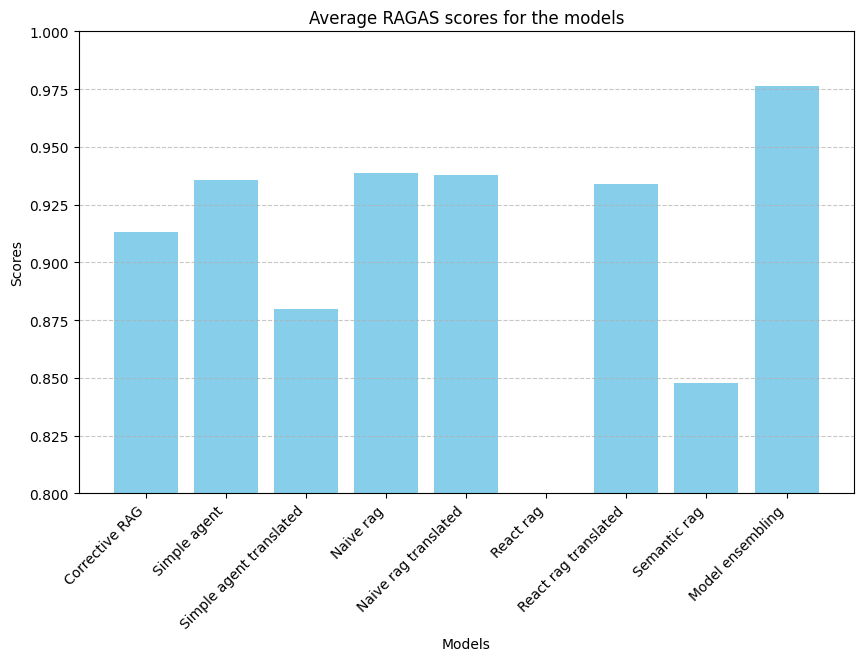

In [43]:
# avg RAGAS Scores for each model (example data)
model_names = ["Corrective RAG", "Simple agent", "Simple agent translated", "Naive rag", "Naive rag translated", "React rag", "React rag translated", "Semantic rag","Model ensembling"]
scores = [avg_corrective_rag_translated_score_RAGAS, avg_simple_agent_rag_score_RAGAS, avg_simple_agent_translated_rag_score_RAGAS, avg_naive_rag_score_RAGAS, avg_naive_rag_translated_score_RAGAS, avg_react_rag_score_RAGAS, avg_react_rag_translated_score_RAGAS, avg_semantic_rag_score_RAGAS,avg_ensemble_models_score_RAGAS]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Average RAGAS scores for the models')
plt.ylim(0.8, 1)  # Set y-axis limits to 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

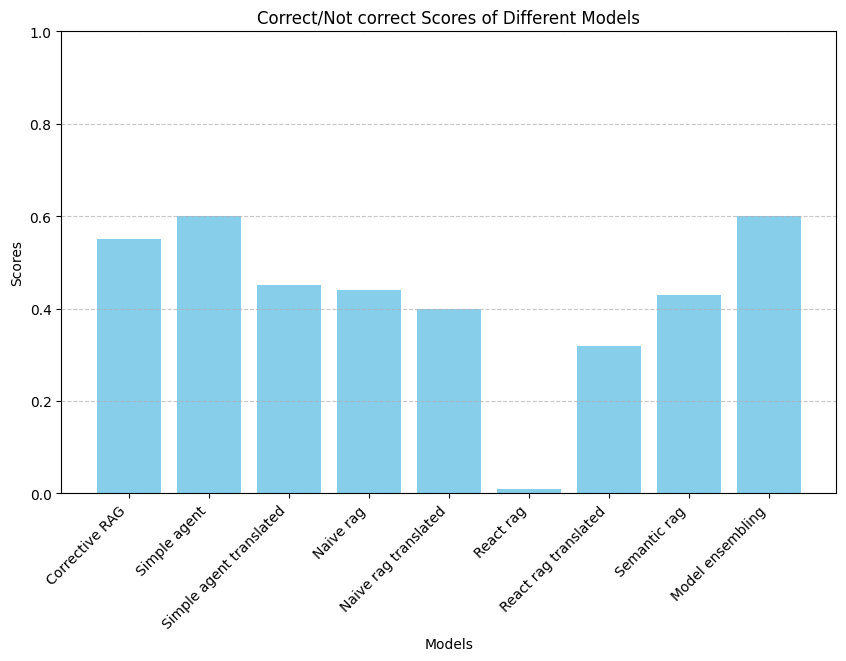

In [54]:
# Correct Scores for each model (example data)
model_names = ["Corrective RAG", "Simple agent", "Simple agent translated", "Naive rag", "Naive rag translated", "React rag", "React rag translated", "Semantic rag","Model ensembling"]
scores = [corrective_rag_score, simple_agent_score, simple_agent_translated_score, naive_rag_score, naive_rag_translated_score, react_rag_score, react_rag_translated_score, semantic_rag_score,ensemble_models_score]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Correct/Not correct Scores of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
## Skriver alle resultatene til en tekst-fil
import math


answer_relevancy_scores = [answer_relevancy_corrective, answer_relevancy_simple_agent, answer_relevancy_simple_agent_translated, answer_relevancy_naive_rag, answer_relevance_naive_rag_translated, answer_relevancy_react, answer_relevancy_react_translated, answer_relevancy_semantic,answer_relevancy_ensemble]
average_ragas_scores = [avg_corrective_rag_translated_score_RAGAS, avg_simple_agent_rag_score_RAGAS, avg_simple_agent_translated_rag_score_RAGAS, avg_naive_rag_score_RAGAS, avg_naive_rag_translated_score_RAGAS, avg_react_rag_score_RAGAS, avg_react_rag_translated_score_RAGAS, avg_semantic_rag_score_RAGAS,avg_ensemble_models_score_RAGAS]
correct_not_scores = [corrective_rag_score, simple_agent_score, simple_agent_translated_score, naive_rag_score, naive_rag_translated_score, react_rag_score, react_rag_translated_score, semantic_rag_score,ensemble_models_score]
ragas_ensemble = [ensemble_models_score_RAGAS_1, ensemble_models_score_RAGAS_2, ensemble_models_score_RAGAS_3, ensemble_models_score_RAGAS_4]
ragas_corrective =[corrective_rag_translated_score_RAGAS_1, corrective_rag_translated_score_RAGAS_2, corrective_rag_translated_score_RAGAS_3, corrective_rag_translated_score_RAGAS_4]
ragas_simple_agent_translated = [simple_agent_translated_rag_score_RAGAS_1, simple_agent_translated_rag_score_RAGAS_2, simple_agent_translated_rag_score_RAGAS_3, simple_agent_translated_rag_score_RAGAS_4]
ragas_simple_agent = [simple_agent_rag_score_RAGAS_1, simple_agent_rag_score_RAGAS_2, simple_agent_rag_score_RAGAS_3, simple_agent_rag_score_RAGAS_4]
ragas_naive_rag = [naive_rag_score_RAGAS_1, naive_rag_score_RAGAS_2, naive_rag_score_RAGAS_3, naive_rag_score_RAGAS_4]
ragas_naive_rag_translated = [naive_rag_translated_score_RAGAS_1, naive_rag_translated_score_RAGAS_2, naive_rag_translated_score_RAGAS_3, naive_rag_translated_score_RAGAS_4]
ragas_react = [react_rag_score_RAGAS_1, react_rag_score_RAGAS_2, react_rag_score_RAGAS_3, react_rag_score_RAGAS_4]
ragas_react_translated = [react_rag_translated_score_RAGAS_1, react_rag_translated_score_RAGAS_2, react_rag_translated_score_RAGAS_3, react_rag_translated_score_RAGAS_4]
ragas_semantic = [semantic_rag_score_RAGAS_1, semantic_rag_score_RAGAS_2, semantic_rag_score_RAGAS_3, semantic_rag_score_RAGAS_4]
# Open a text file in write mode
with open('/Users/adrianfolge/Documents/lokal:skole/Master/master_folder/eval_data/final_eval_data.txt', 'w') as file:
    # Write the elements of list1 to the file
    file.write("Answer relevancy scores:\n")
    for item in answer_relevancy_scores:
        file.write(str(item) + '\n')
    
    # Write a separator
    file.write("\n")
    
    # Write the elements of list2 to the file
    file.write("Average ragas scores:\n")
    for item in average_ragas_scores:
        if math.isnan(item):
            file.write("0\n")
        else:
            file.write(str(item) + '\n')
    
    # Write a separator
    file.write("\n")
    
    # Write the elements of list3 to the file
    file.write("Correct not correct scores:\n")
    for item in correct_not_scores:
        file.write(str(item) + '\n')
    
    file.write("Ragas ensemble scores:\n")
    for item in ragas_ensemble:
        file.write(str(item) + '\n')
    
    file.write("Ragas corrective scores:\n")
    for item in ragas_corrective:
        file.write(str(item) + '\n')
    
    file.write("Ragas simple agent translated scores:\n")
    for item in ragas_simple_agent_translated:
        file.write(str(item) + '\n')
    
    file.write("Ragas simple agent scores:\n")
    for item in ragas_simple_agent:
        file.write(str(item) + '\n')
    
    file.write("Ragas naive rag scores:\n")
    for item in ragas_naive_rag:
        file.write(str(item) + '\n')
    file.write("Ragas naive rag translated scores:\n")
    for item in ragas_naive_rag_translated:
        file.write(str(item) + '\n')
    file.write("Ragas react rag scores:\n")
    for item in ragas_react:
        file.write(str(item) + '\n')
    file.write("Ragas react rag translated scores:\n")
    for item in ragas_react_translated:
        file.write(str(item) + '\n')
    file.write("Ragas semantic scores:\n")
    for item in ragas_semantic:
        file.write(str(item) + '\n')
print("Lists have been saved to 'lists.txt' file.")


Lists have been saved to 'lists.txt' file.
